# IMPORTAR LIBRERIAS

In [25]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 
___

# DATA SETS - LECTURA

In [26]:
df_academico = pd.read_csv("../01_data/01_raw/Predict Student Dropout and Academic Success.csv", sep=";") 
df_academico = df_academico.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'})
df_academico.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [27]:
df_academico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [28]:
df_academico['Target'].value_counts(normalize=False)

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [29]:
df_academico = df_academico[df_academico['Target'] != 'Enrolled']

In [30]:
df_academico['Target'] = np.where(df_academico['Target'] == 'Graduate', 1, 0)

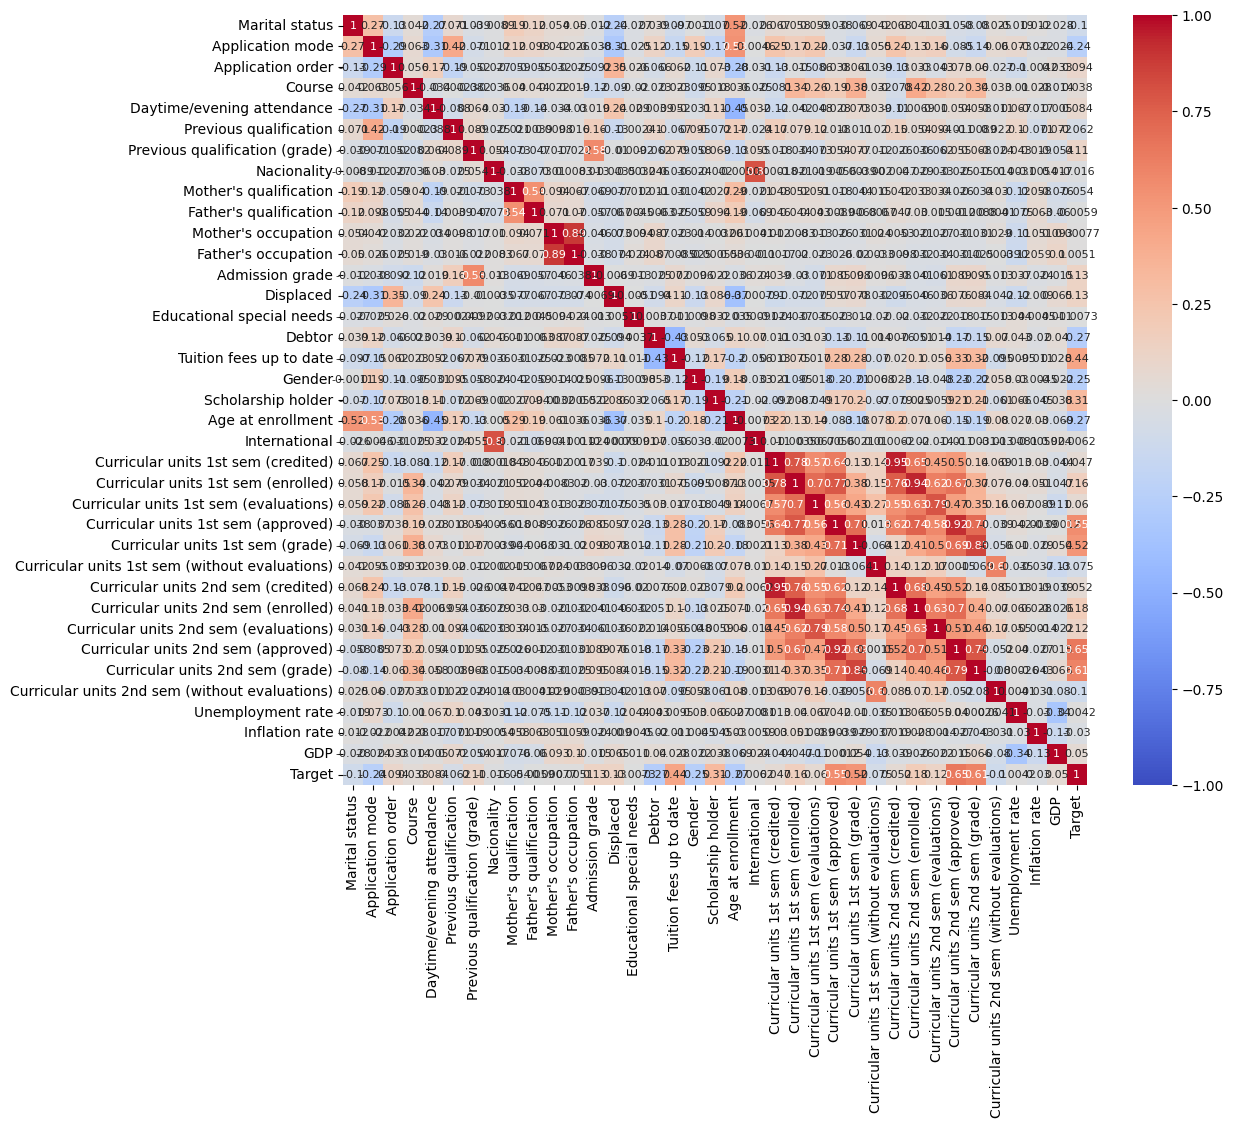

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_academico.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

In [32]:
# df_academico.to_csv('ds_academico_limpio.csv', index=False)

In [33]:
columnas_a_eliminar = [
    'Marital status', 'Displaced', 'Application mode', 'Application order', 
    'Course', 'Unemployment rate', 'Inflation rate', 'GDP', 
    "Mother's occupation", "Father's occupation", 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (without evaluations)', 'Nacionality'
]

df_academico = df_academico.drop(columns=columnas_a_eliminar)

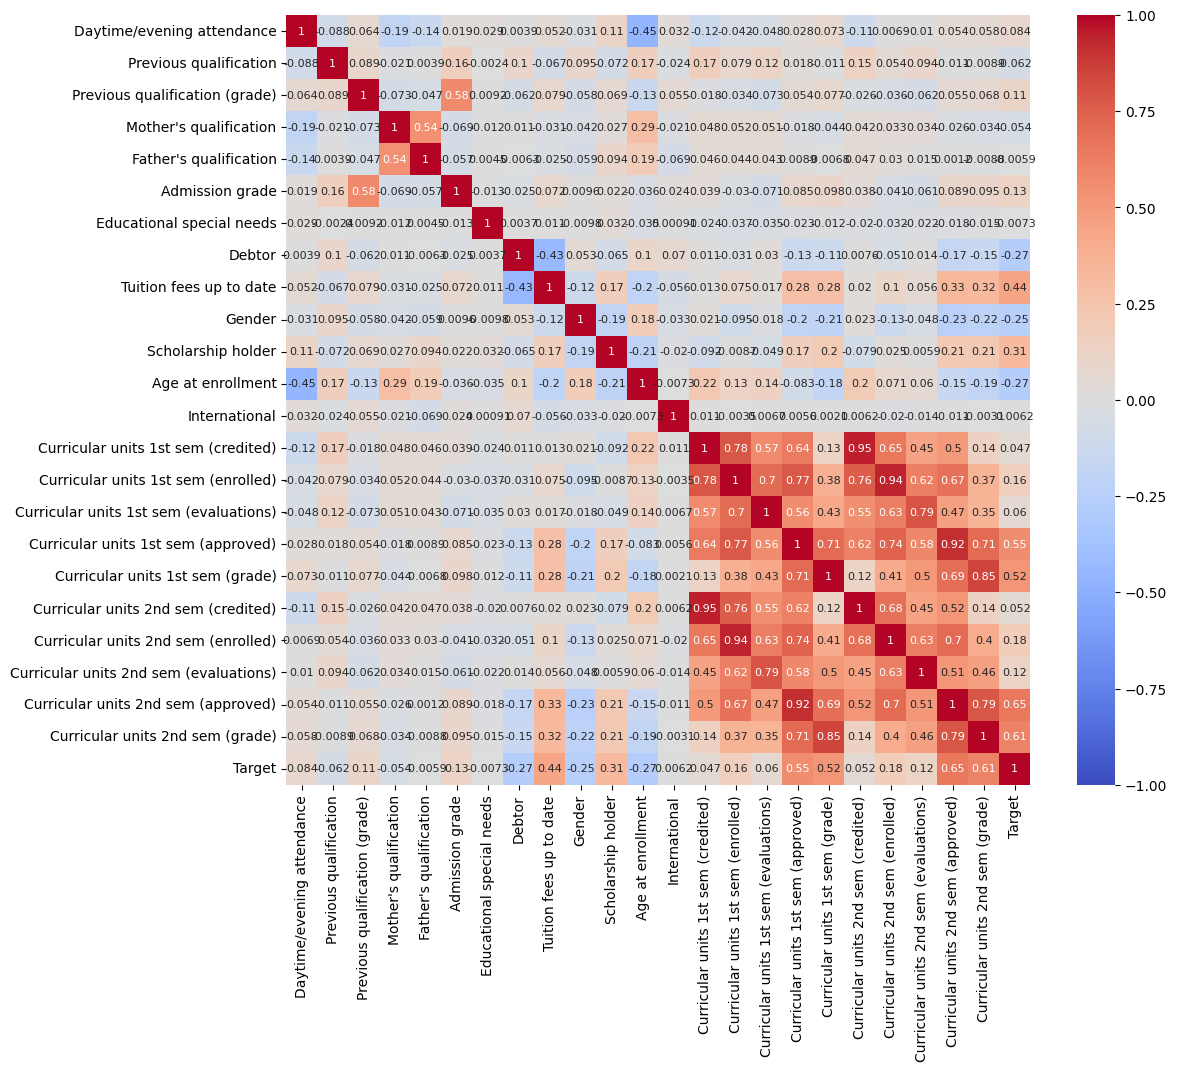

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_academico.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

# 📑 Descripción de las Columnas del Dataset

---

## 🏫 Información Académica y de Admisión
- **Daytime/evening attendance**: Indica si el estudiante asiste durante el día (`1`) o en la noche (`0`).
- **Previous qualification**: Nivel de estudios previo del estudiante.
- **Previous qualification (grade)**: Calificación obtenida en los estudios previos.
- **Admission grade**: Nota de admisión del estudiante.

---

## 👪 Información Familiar
- **Mother's qualification**: Nivel educativo de la madre.
- **Father's qualification**: Nivel educativo del padre.

---

## 🎓 Rendimiento Académico en el Curso

### Primer Semestre
- **Curricular units 1st sem (credited)**: Unidades curriculares aprobadas en el primer semestre.
- **Curricular units 1st sem (enrolled)**: Unidades inscritas en el primer semestre.
- **Curricular units 1st sem (evaluations)**: Evaluaciones realizadas en el primer semestre.
- **Curricular units 1st sem (approved)**: Unidades aprobadas en el primer semestre.
- **Curricular units 1st sem (grade)**: Calificación promedio en el primer semestre.

### Segundo Semestre
- **Curricular units 2nd sem (credited)**: Unidades curriculares aprobadas en el segundo semestre.
- **Curricular units 2nd sem (enrolled)**: Unidades inscritas en el segundo semestre.
- **Curricular units 2nd sem (evaluations)**: Evaluaciones realizadas en el segundo semestre.
- **Curricular units 2nd sem (approved)**: Unidades aprobadas en el segundo semestre.
- **Curricular units 2nd sem (grade)**: Calificación promedio en el segundo semestre.

---

## 💰 Información Financiera
- **Debtor**: Indica si el estudiante tiene deudas (`1`) o no (`0`).
- **Tuition fees up to date**: Indica si las tasas de matrícula están al día (`1`) o no (`0`).
- **Scholarship holder**: Indica si el estudiante es beneficiario de una beca (`1`) o no (`0`).

---

## 🧑‍🎓 Información Personal y Social
- **Gender**: Género del estudiante (`0` para hombre, `1` para mujer).
- **Age at enrollment**: Edad del estudiante al momento de la inscripción.
- **International**: Indica si el estudiante es internacional (`1`) o no (`0`).

---

## 👥 Información de Necesidades Especiales
- **Educational special needs**: Indica si el estudiante tiene necesidades educativas especiales (`1`) o no (`0`).

---

## 🎯 Variable Objetivo
- **Target**: La variable objetivo que indica el estado final del estudiante (por ejemplo, "Dropout" o "Graduate").


#
___

# INTERPRETACION COLUMNAS - FEATURE ENGINEERING

In [35]:
df_academico.head(1)

,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,1,122.0,19,12,127.3,0,0,1,1,...,0,0,0,0.0,0,0,0,0,0.0,0


In [36]:
def categorize_previous_qualification(value):
    if value < 15:             # Nivel "Bajo"
        return 1
    elif 15 <= value < 30:     # Nivel "Medio" 
        return 2
    else:                     # Nivel "Alto" 
        return 3

In [37]:
def categorize_previous_qualification_grade(grade):
    if grade <= 100:
        return 1
    elif 101 <= grade <= 150:
        return 2
    else:
        return 3

In [38]:
def categorize_parents_qualification(value):
    if value <= 10:
        return 1
    elif 11 <= value <= 30:
        return 2
    else:
        return 3

In [39]:
def categorize_age_at_enrollment(age):
    if age <= 22:
        return 1
    elif 23 <= age <= 35:
        return 2
    else:
        return 3

In [40]:
df_academico['Previous qualification'] = df_academico['Previous qualification'].apply(categorize_previous_qualification)
df_academico['Previous qualification (grade)'] = df_academico['Previous qualification (grade)'].apply(categorize_previous_qualification_grade)
df_academico["Father's qualification"] = df_academico["Father's qualification"].apply(categorize_parents_qualification)
df_academico["Mother's qualification"] = df_academico["Mother's qualification"].apply(categorize_parents_qualification)
df_academico['Admission grade'] = df_academico['Admission grade'].apply(categorize_previous_qualification_grade)
df_academico['Age at enrollment'] = df_academico['Age at enrollment'].apply(categorize_age_at_enrollment)

In [41]:
df_academico["Tuition fees up to date"].value_counts(normalize=False).sort_index()

Tuition fees up to date
0     486
1    3144
Name: count, dtype: int64

In [42]:
df_academico.head(1)

,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,1,1,2,2,2,2,0,0,1,1,...,0,0,0,0.0,0,0,0,0,0.0,0


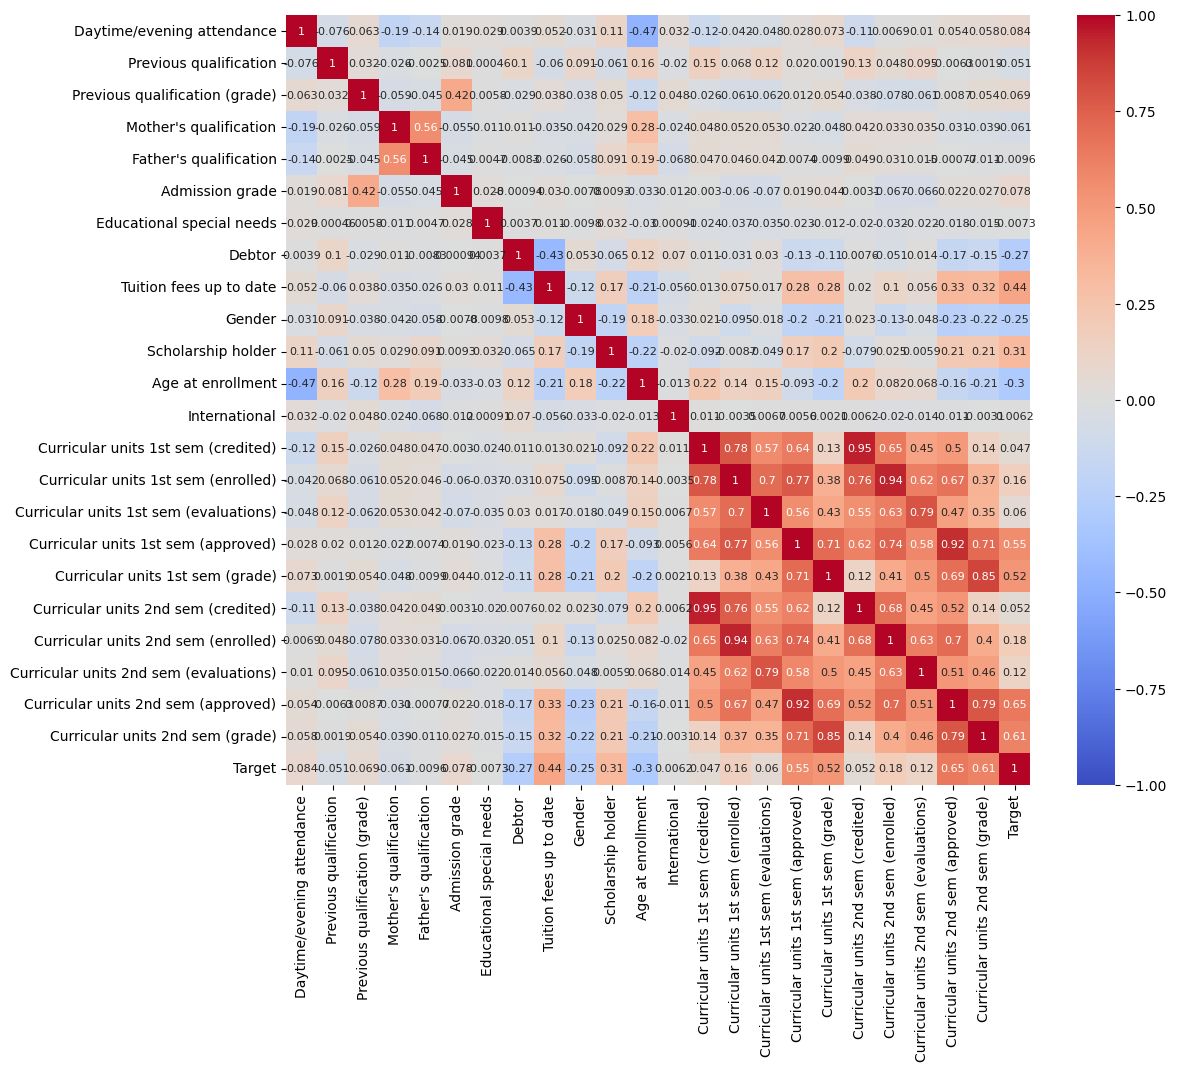

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_academico.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

In [44]:
# # elimino las columnas que tienen una correlacion muy baja a pesar del feature

# columnas_a_eliminar = [
#     'Daytime/evening attendance', 'International', 'Debtor', 'Gender', 'Educational special needs',
#     'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
#     'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)'
# ]

# df_academico = df_academico.drop(columns=columnas_a_eliminar)


# MEJOR LAS DEJO ...

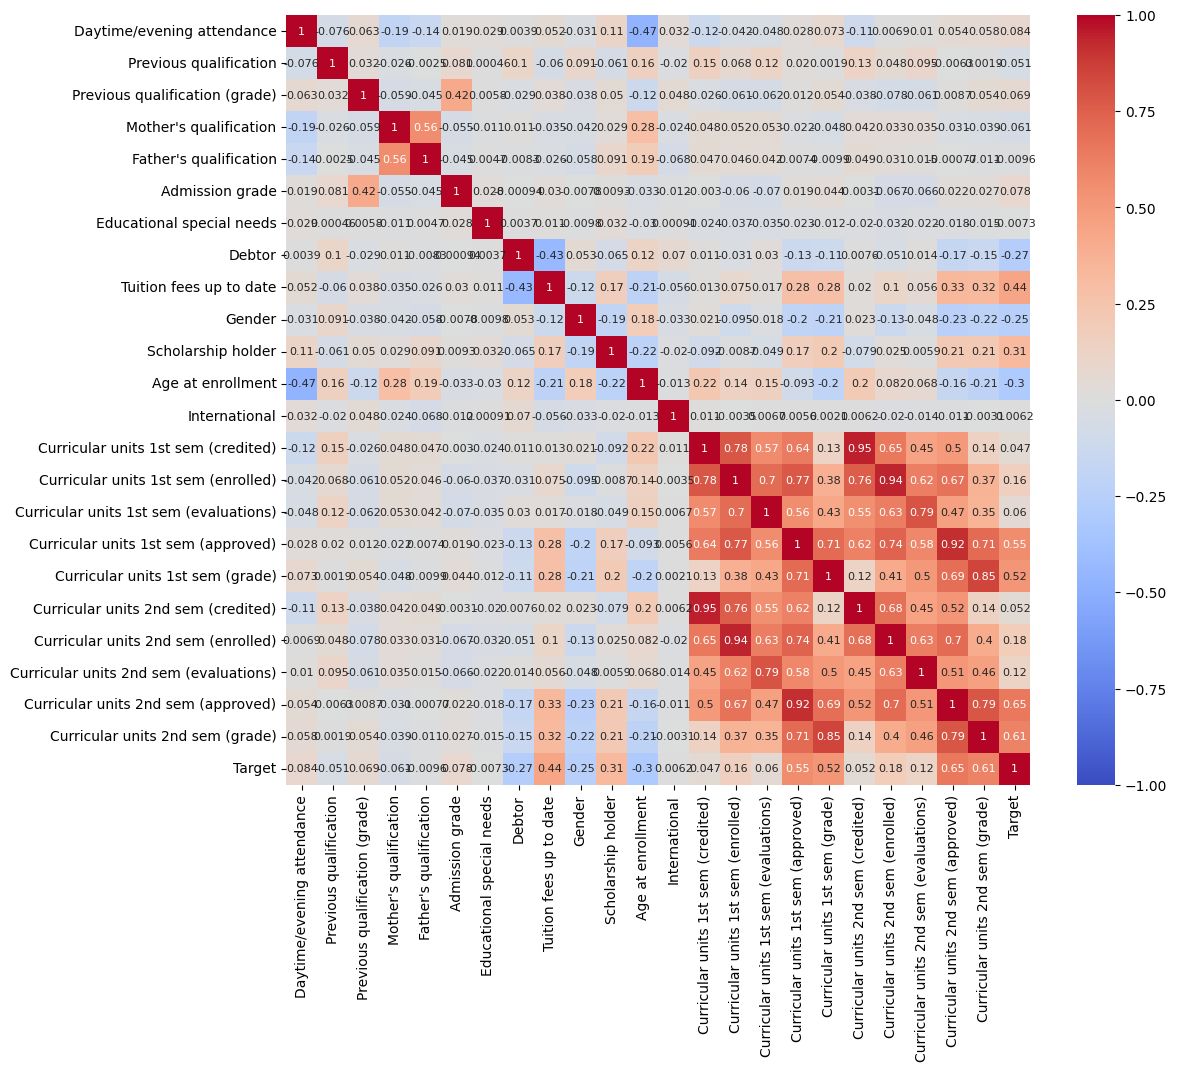

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_academico.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

# 
___

# CORRELACION ANALISIS

## 📊 Observaciones Clave en el Rendimiento Académico de Estudiantes (Variable **Target**)

---

### 1. 🏫 **Asistencia (Daytime/evening attendance)** y **Rendimiento (Target)**
- **Correlación**: -0.084
- **Interpretación**: La correlación es baja y negativa, indicando que el tipo de asistencia (diurna o vespertina) no tiene una relación significativa con el rendimiento académico. 🎒

---

### 2. 📈 **Calificación Anterior (Previous qualification)** y **Rendimiento (Target)**
- **Correlación**: 0.519
- **Interpretación**: Hay una correlación positiva moderada, lo que sugiere que los estudiantes con buenas calificaciones previas tienden a tener un mejor rendimiento académico actual. Esto puede reflejar la consistencia en el desempeño académico. 📚

---

### 3. 👩‍🏫 **Calificación de la Madre (Mother's qualification)** y **Rendimiento (Target)**
- **Correlación**: 0.203
- **Interpretación**: Existe una correlación positiva baja, indicando que el nivel educativo de la madre tiene una relación leve con el rendimiento académico del estudiante, posiblemente debido a un entorno de apoyo en el hogar. 🏠

---

### 4. 👨‍🏫 **Calificación del Padre (Father's qualification)** y **Rendimiento (Target)**
- **Correlación**: 0.161
- **Interpretación**: Al igual que la calificación de la madre, el nivel educativo del padre tiene una correlación baja con el rendimiento académico, sugiriendo que el contexto educativo familiar puede tener una pequeña influencia. 👨‍👩‍👦

---

### 5. 📜 **Calificación de Admisión (Admission grade)** y **Rendimiento (Target)**
- **Correlación**: 0.342
- **Interpretación**: La calificación de admisión muestra una correlación positiva moderada con el rendimiento actual, indicando que una buena calificación de ingreso puede ser un indicador de éxito académico. 🏅

---

### 6. 💵 **Deudas (Debtor)** y **Rendimiento (Target)**
- **Correlación**: -0.138
- **Interpretación**: Existe una correlación negativa leve, lo que sugiere que los estudiantes con deudas pendientes podrían tener un rendimiento académico ligeramente más bajo, posiblemente debido a factores de estrés financiero. 💸

---

### 7. 🕒 **Edad al Ingresar (Age at enrollment)** y **Rendimiento (Target)**
- **Correlación**: -0.3
- **Interpretación**: Hay una correlación negativa moderada, lo cual indica que los estudiantes que ingresan a una edad más avanzada tienden a tener un rendimiento ligeramente inferior en comparación con los estudiantes más jóvenes. 📅

---

### 8. 🎓 **Créditos y Evaluaciones en las Unidades Curriculares (1er y 2do Semestre)** y **Rendimiento (Target)**
- **Correlaciones Positivas (0.3 a 0.8)**: 
  - Las variables relacionadas con unidades curriculares del primer y segundo semestre, como **créditos**, **enrollments**, y **evaluaciones**, muestran correlaciones positivas moderadas a altas con el rendimiento académico.
  - **Interpretación**: Estas variables son fuertes indicadores del rendimiento académico, pues reflejan el esfuerzo y el éxito del estudiante en cada semestre. 📈

---

## 📌 Resumen General
- **Factores que muestran correlaciones positivas con el rendimiento académico (Target)**:
  - 📈 **Calificaciones Previas**
  - 🎓 **Calificación de Admisión**
  - 👨‍👩‍👦 **Nivel Educativo de los Padres**
  - 🏅 **Unidades Curriculares (1er y 2do semestre)**

- **Factores que muestran correlaciones negativas**:
  - 💸 **Deudas**
  - 🕒 **Edad al Ingresar**

## 📝 Conclusión
En términos generales, los factores más influyentes en el rendimiento académico (Target) de los estudiantes en este conjunto de datos son:

- **Calificaciones previas y de admisión**: Estas variables muestran una fuerte relación con el éxito académico actual, indicando la consistencia en el desempeño. 📚
- **Edad y situación financiera**: La edad al ingresar y las deudas pendientes pueden afectar ligeramente de manera negativa el rendimiento académico. 🛑
- **Unidades curriculares**: El desempeño en los créditos y evaluaciones de las unidades curriculares es un buen indicador del rendimiento final. 📈

Estos hallazgos pueden ayudar a identificar áreas donde se puede intervenir para mejorar el éxito académico, como brindar apoyo financiero o académico a estudiantes mayores o con deudas. 🎓

# 
___

# EXPORTAR MODELOS LIMPIOS

In [46]:
df_academico.to_csv('ds_academico.csv', index=False)

In [47]:
# X = df_academico.drop(columns=['Target']) 
# y = df_academico['Target']


# # Dividir el dataset en 90% entrenamiento y 10% prueba de manera aleatoria
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# train_df = X_train.copy()
# train_df['Target'] = y_train  


# # conjunto de entrenamiento 
# train_df.to_csv('ds_academico_train.csv', index=False)  

# # conjunto de prueba 
# X_test.to_csv('ds_academico_test.csv', index=False) 

#
 ___

In [48]:
train_df, test_df = train_test_split(df_academico, test_size=0.1, random_state=42)

# conjunto de entrenamiento 
train_df.to_csv('ds_academico_train.csv', index=False)

# conjunto de prueba 
test_df.to_csv('ds_academico_test.csv', index=False)

#
___